In [1]:
import logging
# set seed
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import utils as ut
import experiment as exp
import evaluation as ev
from pathlib import *
import torch
import random
import regex as re
import plot
import matplotlib.pyplot as plt
from sk_models import LocalWeightedRegression, PCR, setup_pls_models, PLSRegression, LinearRidge, CustomWrapper

In [2]:
seed = 1
torch.manual_seed(seed)
random.seed(seed + 1)
np.random.seed(seed + 2)

random_state = np.random.RandomState(seed)

In [3]:
#we need to set parametesr
file_name = "mango_684_990.csv"#"PLN7.csv" A_FE_RT  A_C_OF_alpha #"mango_513_1050.csv" #"mango_684_990.csv" #"mango_729_975.csv"
id_cols =[]#["sample_id"] "db_id","sample_id"
n_comps = [i for i in range(1,101)]

data_path = Path('D:/workspace/lazydeep/data/soil_data/')
log_path = Path("D:/workspace/lazydeep/experiments/0.00")

In [4]:
data_file = data_path / file_name
log_dir = log_path / re.sub(r'\.(?=csv$)[^.]+$', '',file_name)
if not log_dir.exists():
    log_dir.mkdir()
print(log_dir)

data = pd.read_csv(data_file)
nrow, ncol = data.shape
data = ut.sample_data(data,random_state)

n_features = ncol - 1-len(id_cols)
dataset = ut.TabularDataset(data,id_cols = id_cols, cat_cols=None, output_cols=None, ignore_cols= None)

# todo write a summary
#ut.setup_logger(logger_name="",file_name=log_dir/"log.txt")
ut.setup_logger(logger_name="summary",file_name=log_dir/"summary.txt")
#tb = SummaryWriter(log_dir/"tb")
print(log_dir)

D:\workspace\lazydeep\experiments\0.00\mango_684_990
D:\workspace\lazydeep\experiments\0.00\mango_684_990


In [5]:
scores_db = pd.read_csv(log_dir/"scores.csv")
lr_db = scores_db[scores_db["n_comp"]=="None"]
pp_db  = scores_db[scores_db["n_comp"]!="None"]

In [6]:
print(pp_db)

          model n_comp    fold_0    fold_1    fold_2    fold_3    fold_4  \
4           pcr      1  5.799490  5.521217  5.892004  6.078157  5.598487   
5     pcr_scale      1  6.135023  5.849225  6.174802  6.412866  5.801493   
6    pcr_whiten      1  5.799490  5.521217  5.892004  6.078157  5.598487   
7       pcr_s_w      1  6.135023  5.849225  6.174802  6.412866  5.801493   
8           pcr      2  5.256803  4.915477  5.179252  5.406583  4.862006   
..          ...    ...       ...       ...       ...       ...       ...   
599  plsr_scale     98  0.709177  0.722869  0.679881  0.779999  0.720286   
600        plsr     99  0.709066  0.722822  0.679868  0.780193  0.720617   
601  plsr_scale     99  0.709172  0.722864  0.679881  0.780404  0.720533   
602        plsr    100  0.709063  0.722816  0.679866  0.780217  0.721398   
603  plsr_scale    100  0.709071  0.722833  0.679907  0.780036  0.721211   

          MSE        R2  
4    5.779116  0.048261  
5    6.076157 -0.000657  
6    5.77

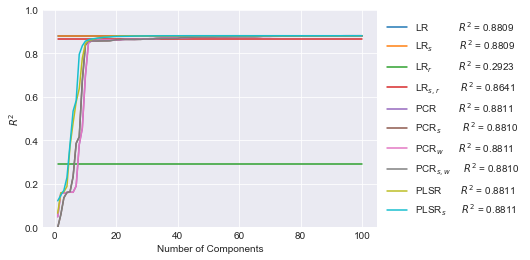

In [7]:
plt.style.use('seaborn-darkgrid')

name_dict ={'lr':f'LR       ',
           'lr_norm':f'LR$_s$      ',
           'ridge':f'LR$_r$      ',
           'ridge_norm':r'LR$_{s,r}$    ',
           'pcr':f'PCR    ',
           'pcr_scale':f'PCR$_s$    ',
           'pcr_whiten':f'PCR$_w$  ',
           'pcr_s_w':r'PCR$_{s,w}$ ',
           'plsr':f'PLSR   ',
           'plsr_scale':f'PLSR$_s$  ',  
          }

fig, ax = plt.subplots()
ax.set_xlabel("Number of Components")
ax.set_ylabel(f"$R^2$")

series_labels = lr_db['model'].unique()
for name in series_labels:
    subset = lr_db[lr_db["model"]==name]
    y = [subset["R2"].tolist()[0] for _ in n_comps]
    x = n_comps
    score=subset["R2"].tolist()[0] 
    label = "%-*s   %s" %(5, name_dict[name],f" $R^2$ = {score:.4f}")
    ax.plot(x,y,label = label)
series_labels = pp_db['model'].unique()
for name in series_labels:
    subset = pp_db[pp_db["model"]==name]
    score= max(subset["R2"])
    label = "%-*s   %s" %(5, name_dict[name],f" $R^2$ = {score:.4f}")
    ax.plot([int(i) for i in subset["n_comp"]], subset["R2"],label =label )

ax.set_ylim(0,1)
ax.legend(loc='upper right',bbox_to_anchor=(1.45, 1))
plt.savefig(log_dir / f"r2_plot.png",bbox_inches='tight')

#$print "Location: %-*s  Revision: %s" % (20,"10-10-10-10","1")